In [1]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os

/home/jiata/miniconda3/envs/ml/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.reset_default_graph()
sess = tf.InteractiveSession()

In [3]:
# First, load the image again
dir_path = os.path.dirname(os.path.realpath('__file__'))
filename = dir_path + "/raw_data/mnist_two.png"

In [4]:
image_string = tf.read_file(filename)
image_decoded = tf.image.decode_jpeg(image_string, channels=3)
image = tf.image.resize_images(image_decoded, [28, 28])
image = tf.cast(image, tf.uint8)
image = 255 - image

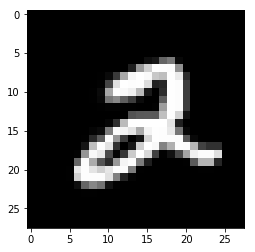

In [5]:
plt.imshow(image.eval(), cmap='gray')
plt.show()

In [6]:
image = tf.reshape(image[:, :, 0], [-1, 784])

In [7]:
#First let's load meta graph and restore weights
saver = tf.train.import_meta_graph('./models/model0.meta')
saver.restore(sess, tf.train.latest_checkpoint('./models'))

# Now, let's access and create placeholders variables
graph = tf.get_default_graph()
x = graph.get_tensor_by_name("input/input:0")
keep_prob = graph.get_tensor_by_name("input/keep_prob:0")
preds = graph.get_tensor_by_name("evaluation/preds:0")

# Calculate accuracy for MNIST test images
print("score image:", \
    sess.run(tf.argmax(preds, 1), feed_dict={x: image.eval(), keep_prob: 0.9}))

INFO:tensorflow:Restoring parameters from ./models/model0
score image: [2]


In [8]:
# sess.close()

In [9]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


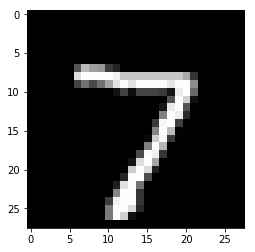

In [10]:
image = tf.reshape(mnist.test.images[0], [28, 28])

plt.imshow(image.eval(), cmap='gray')
plt.show()

In [11]:
image = tf.reshape(image, [-1, 784])